# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음
* 두 범주를 여유있게 가르고 있는것, 가르고 있는 거리를 margin이라고 함 이 margin을 최대화 하는 경계면을 찾는 것임


In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.svm import SVR,SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris,load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE


## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [6]:
X,y=load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =123)

model=SVR()
model.fit(X_train,y_train)

print("학습데이터 점수:{}".format(model.score(X_train,y_train)))
print("평가데이터 점수:{}".format(model.score(X_test,y_test)))


학습데이터 점수:0.2177283706374875
평가데이터 점수:0.13544178468518187


### SVM을 사용한 분류 모델 (SVC)

In [7]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =123)

model=SVC()
model.fit(X_train,y_train)

print("학습데이터 점수:{}".format(model.score(X_train,y_train)))
print("평가데이터 점수:{}".format(model.score(X_test,y_test)))


학습데이터 점수:0.9014084507042254
평가데이터 점수:0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [11]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

linear_svr = SVR(kernel ='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 학습데이터 점수:{}".format(linear_svr.score(X_train,y_train)))
print("Linear SVR 평가데이터 점수:{}".format(linear_svr.score(X_test,y_test)))

polynomial_svr = SVR(kernel ='poly')
polynomial_svr.fit(X_train,y_train)

print("Polynomial SVR 학습데이터 점수:{}".format(polynomial_svr.score(X_train,y_train)))
print("Polynomial SVR 평가데이터 점수:{}".format(polynomial_svr.score(X_test,y_test)))

rbf_svr = SVR(kernel ='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 학습데이터 점수:{}".format(rbf_svr.score(X_train,y_train)))
print("RBF SVR 평가데이터 점수:{}".format(rbf_svr.score(X_test,y_test)))

Linear SVR 학습데이터 점수:0.715506620496448
Linear SVR 평가데이터 점수:0.6380398541506058
Polynomial SVR 학습데이터 점수:0.2024454261446289
Polynomial SVR 평가데이터 점수:0.133668450367462
RBF SVR 학습데이터 점수:0.2177283706374875
RBF SVR 평가데이터 점수:0.13544178468518187


In [12]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

linear_svc = SVC(kernel ='linear')
linear_svc.fit(X_train,y_train)

print("Linear SVC 학습데이터 점수:{}".format(linear_svc.score(X_train,y_train)))
print("Linear SVC 평가데이터 점수:{}".format(linear_svc.score(X_test,y_test)))

polynomial_svc = SVC(kernel ='poly')
polynomial_svc.fit(X_train,y_train)

print("Polynomial SVC 학습데이터 점수:{}".format(polynomial_svc.score(X_train,y_train)))
print("Polynomial SVC 평가데이터 점수:{}".format(polynomial_svc.score(X_test,y_test)))

rbf_svc = SVR(kernel ='rbf')
rbf_svc.fit(X_train,y_train)

print("RBF SVC 학습데이터 점수:{}".format(rbf_svc.score(X_train,y_train)))
print("RBF SVC 평가데이터 점수:{}".format(rbf_svc.score(X_test,y_test)))

Linear SVC 학습데이터 점수:0.960093896713615
Linear SVC 평가데이터 점수:0.986013986013986
Polynomial SVC 학습데이터 점수:0.9014084507042254
Polynomial SVC 평가데이터 점수:0.9230769230769231
RBF SVC 학습데이터 점수:0.7141833202421761
RBF SVC 평가데이터 점수:0.7625209396028003


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [4]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [6]:
polynomial_svc = SVC(kernel ='poly',degree=2,C=0.1,gamma='auto')
polynomial_svc.fit(X_train,y_train)
print("kernel=poly,degree={},C={},gamma={}".format(2,0.1,'auto'))
print("Polynomial SVC 학습데이터 점수:{}".format(polynomial_svc.score(X_train,y_train)))
print("Polynomial SVC 평가데이터 점수:{}".format(polynomial_svc.score(X_test,y_test)))

kernel=poly,degree=2,C=0.1,gamma=auto
Polynomial SVC 학습데이터 점수:0.9835680751173709
Polynomial SVC 평가데이터 점수:0.993006993006993


In [15]:
rbf_svc = SVC(kernel ='rbf',C=2.0,gamma='scale')
rbf_svc.fit(X_train,y_train)

print("kernel=poly,C={},gamma={}".format(2.0,'scale'))
print("RBF SVC 학습데이터 점수:{}".format(rbf_svc.score(X_train,y_train)))
print("RBF SVC 평가데이터 점수:{}".format(rbf_svc.score(X_test,y_test)))

kernel=poly,C=2.0,gamma=scale
RBF SVC 학습데이터 점수:0.9154929577464789
RBF SVC 평가데이터 점수:0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [16]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [17]:
model = SVC()
model.fit(X_train,y_train)

print("SVC 학습데이터 점수:{}".format(model.score(X_train,y_train)))
print("SVC 평가데이터 점수:{}".format(model.score(X_test,y_test)))

RBF SVC 학습데이터 점수:0.9014084507042254
RBF SVC 평가데이터 점수:0.9230769230769231


In [18]:
#전처리
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train,y_train)

print("SVC 학습데이터 점수:{}".format(model.score(X_train,y_train)))
print("SVC 평가데이터 점수:{}".format(model.score(X_test,y_test)))

SVC 학습데이터 점수:0.9835680751173709
SVC 평가데이터 점수:0.986013986013986


In [22]:
#전처리
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train,y_train)

print("SVC 학습데이터 점수:{}".format(model.score(X_train,y_train)))
print("SVC 평가데이터 점수:{}".format(model.score(X_test,y_test)))

SVC 학습데이터 점수:0.9812206572769953
SVC 평가데이터 점수:0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [29]:
X,y= load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
print("학습데이터 점수:{}".format(model.score(X_train,y_train)))
print("평가데이터 점수:{}".format(model.score(X_test,y_test)))

학습데이터 점수:0.7228806285451547
평가데이터 점수:0.650570512925145


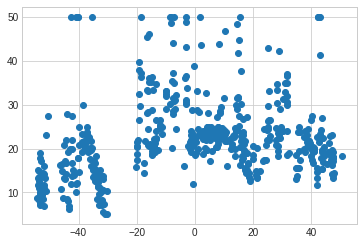

In [39]:
#TSNE 차원축소, 시각화를 하기 위해서 저차원으로 보낸 것
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

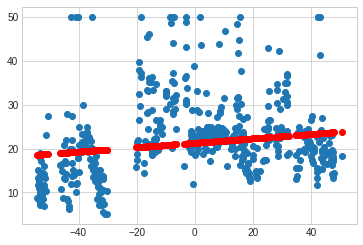

In [43]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict,color='r')

In [45]:
estimator = make_pipeline(StandardScaler(),SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X,y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.02570081, 0.02457285, 0.02377844, 0.02409124, 0.02078462]),
 'score_time': array([0.00204325, 0.00208616, 0.00211072, 0.00202489, 0.00142336]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [49]:
pipe=Pipeline([('scaler',StandardScaler()),
                ('model',SVR(kernel='linear'))])

param_grid = [{'model__gamma':['scale','auto'],
               'model__C':[1.0,0.1,0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs=GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True #설명보기

)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gam

In [50]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

### 당뇨병

## Kernel SVR

### 보스턴 주택 가격

### 당뇨병

## Linear SVC

### 유방암

### 붓꽃

### 와인

## Kernel SVC

### 유방암

### 붓꽃

### 와인